In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

In [2]:
import os
DATA_PATH = os.path.join('..', 'silver', 'daily_feature_set.csv')
NAME_SUFFIX = "daily_v2"
ASSETS = ['SPY', 'TLT.O', 'XLK']
START_OUT_SAMPLE = '2015-01-05'
END_OUT_SAMPLE = '2021-09-30'

#=======================================================| TRAIN

data = pd.read_csv(DATA_PATH, parse_dates=True, index_col=0)
data = data.loc[(~data['TLT.O_logReturns'].isnull()) | (~data['TAIL.K_logReturns'].isnull())]
data.fillna(0, inplace=True)

start_out_samp = pd.Timestamp(START_OUT_SAMPLE)
end_out_samp = pd.Timestamp(END_OUT_SAMPLE)

df_out_sample = data.loc[start_out_samp:end_out_samp, :]

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

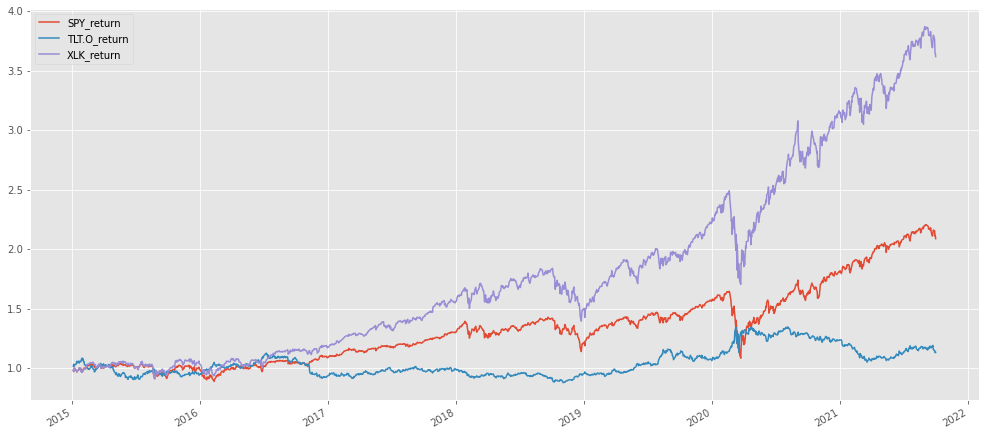

In [3]:
df_out_sample.loc[:, 'SPY'] = df_out_sample[['SPY_logReturns']].apply(np.exp)
df_out_sample.loc[:, 'TLT.O'] = df_out_sample[['TLT.O_logReturns']].apply(np.exp)
df_out_sample.loc[:, 'XLK'] = df_out_sample[['XLK_logReturns']].apply(np.exp)


df_out_sample.loc[:,'XLK_cumsum'] = df_out_sample[['XLK_logReturns']].cumsum()
df_out_sample.loc[:, 'XLK_return'] = df_out_sample['XLK_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'SPY_cumsum'] = df_out_sample[['SPY_logReturns']].cumsum()
df_out_sample.loc[:, 'SPY_return'] = df_out_sample['SPY_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'TLT.O_cumsum'] = df_out_sample[['TLT.O_logReturns']].cumsum()
df_out_sample.loc[:, 'TLT.O_return'] = df_out_sample['TLT.O_cumsum'].apply(np.exp)

df_out_sample[['SPY_return', 'TLT.O_return', 'XLK_return']].plot(figsize=(17, 8))

<AxesSubplot:>

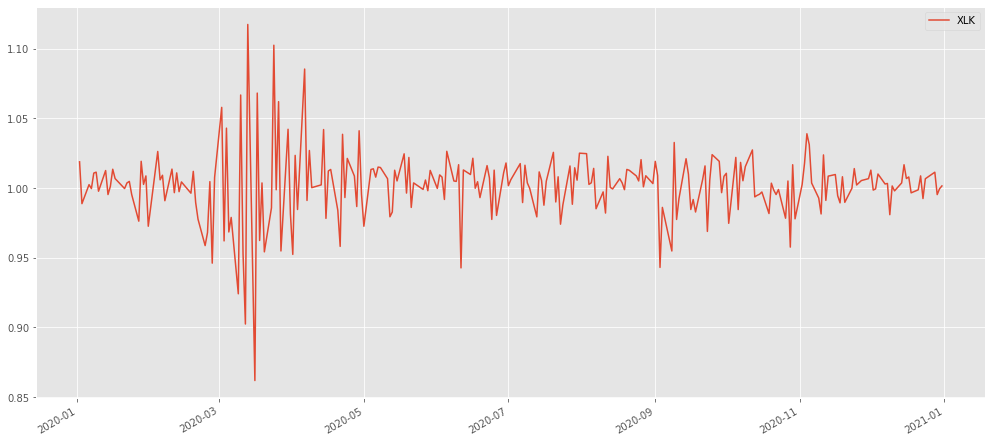

In [4]:
df_out_sample.loc['2020-01-01':'2020-12-31',['XLK']].plot(figsize=(17, 8))

In [5]:
df_out_sample.loc['2020-01-01':'2020-12-31',['TLT.O']].plot(figsize=(17, 8))

<AxesSubplot:>

In [6]:
df_out_sample.loc['2020-01-01':'2020-12-31',['SPY']].plot(figsize=(17, 8))

<AxesSubplot:>

In [7]:
df_out_sample.loc[:, ['XLK_TLT']] = df_out_sample.apply(lambda x: 1 if x['XLK'] > x['TLT.O'] else 0, axis=1)
df_out_sample.loc[:, ['SPY_TLT']] = df_out_sample.apply(lambda x: 1 if x['SPY'] > x['TLT.O'] else 0, axis=1)
df_out_sample.loc[:, ['XLK_SPY']] = df_out_sample.apply(lambda x: 1 if x['XLK'] > x['SPY'] else 0, axis=1)

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 


<AxesSubplot:>

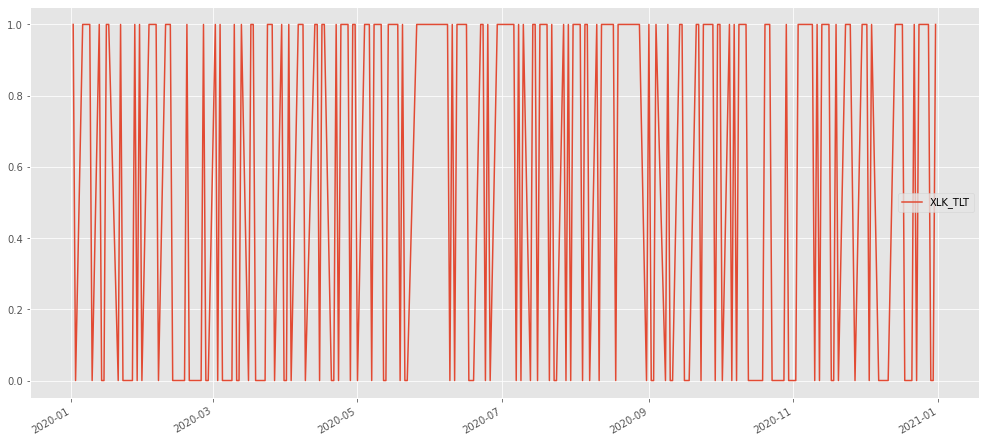

In [8]:
df_out_sample.loc['2020-01-01':'2020-12-31',['XLK_TLT']].plot(figsize=(17, 8))

<AxesSubplot:>

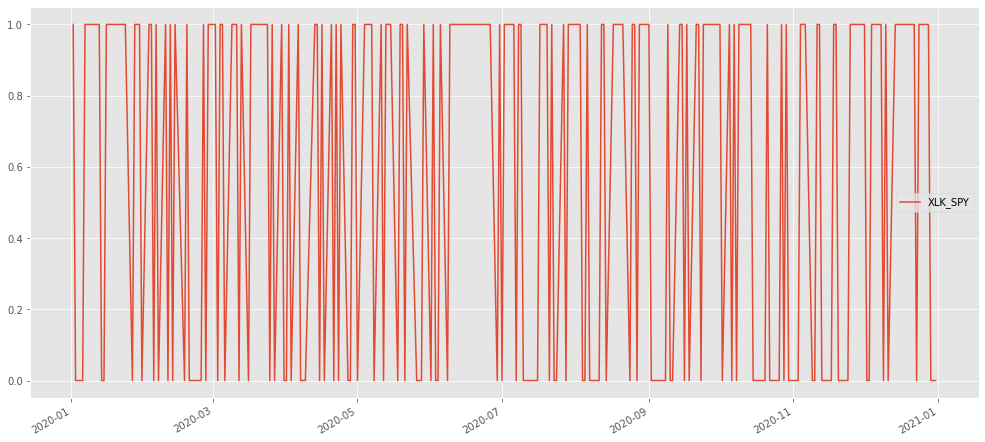

In [9]:
df_out_sample.loc['2020-01-01':'2020-12-31',['XLK_SPY']].plot(figsize=(17, 8))

<AxesSubplot:>

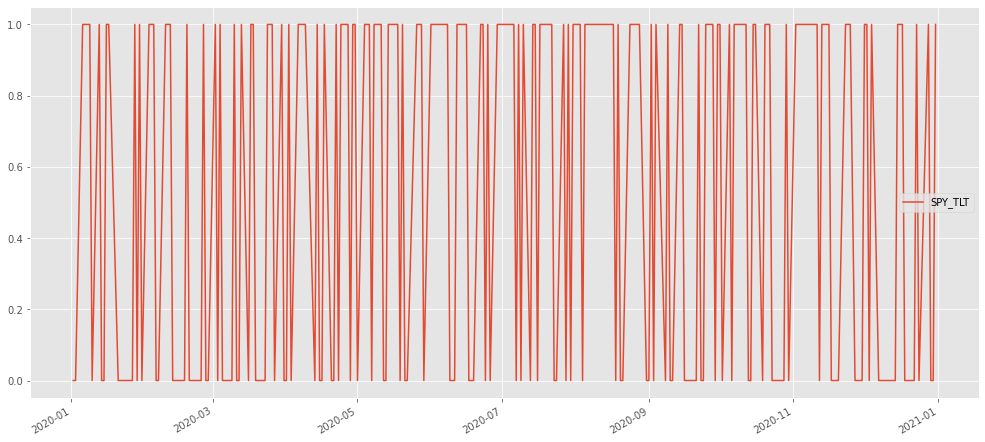

In [10]:
df_out_sample.loc['2020-01-01':'2020-12-31',['SPY_TLT']].plot(figsize=(17, 8))

In [11]:
def bigger(x):
    if (x['XLK'] > x['TLT.O']) and (x['XLK'] > x['SPY']):
        return 'XLK'
    elif(x['SPY'] > x['TLT.O']):
        return 'SPY'
    else:
        return 'TLT.O'
    
    
df_out_sample.loc[:, ['bigger']] = df_out_sample.apply(bigger, axis=1)

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
from collections import Counter
Counter(list(df_out_sample.loc['2020-01-01':'2020-12-31', 'bigger'].values))

Counter({'XLK': 106, 'TLT.O': 98, 'SPY': 49})

In [13]:
df_out_sample.loc['2020-01-01':'2020-12-31', 'bigger']

2020-01-02      XLK
2020-01-03    TLT.O
2020-01-06      SPY
2020-01-07      XLK
2020-01-08      XLK
              ...  
2020-12-24      XLK
2020-12-28      XLK
2020-12-29    TLT.O
2020-12-30    TLT.O
2020-12-31      SPY
Name: bigger, Length: 253, dtype: object

In [14]:
df_out_sample.loc[:,'XLK_b'] = df_out_sample.apply(lambda x: 1 if x['bigger'] == 'XLK' else 0, axis=1)
df_out_sample.loc[:,'SPY_b'] = df_out_sample.apply(lambda x: 1 if x['bigger'] == 'SPY' else 0, axis=1)
df_out_sample.loc[:, 'TLT_b'] = df_out_sample.apply(lambda x: 1 if x['bigger'] == 'TLT.O' else 0, axis=1)

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

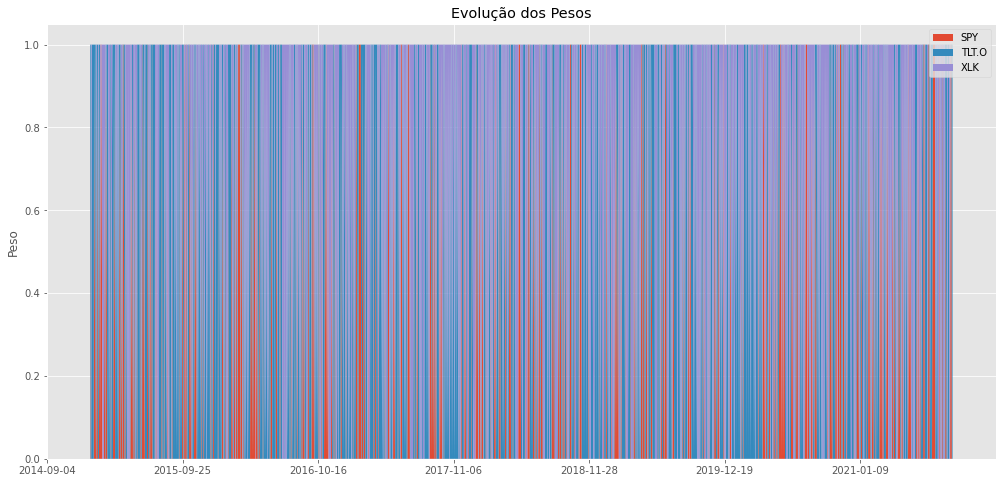

In [15]:
fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_out_sample.index, df_out_sample['SPY_b'], df_out_sample['TLT_b'], df_out_sample['XLK_b'], labels=['SPY', 'TLT.O', 'XLK'])
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
plt.show()

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

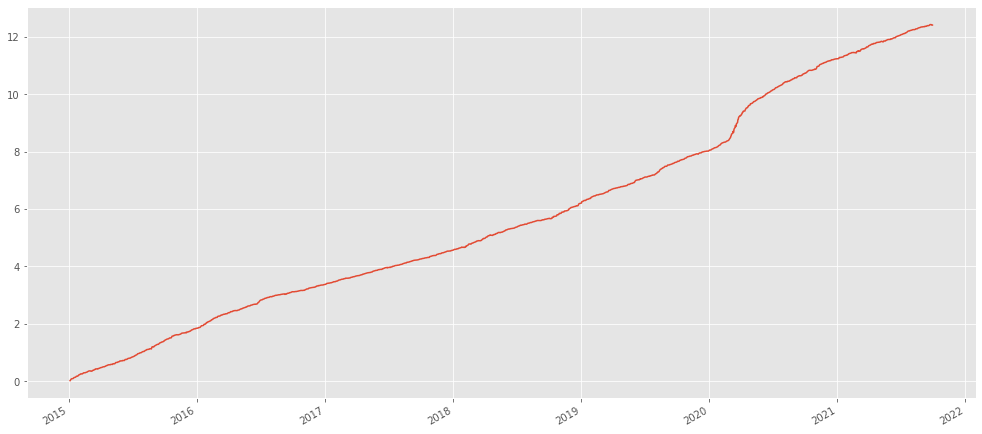

In [16]:
df_out_sample.loc[:, 'port_log'] = df_out_sample.apply(
    lambda x: x['SPY_b'] * x['SPY_logReturns'] + x['TLT_b'] * x['TLT.O_logReturns'] + x['XLK_b'] * x['XLK_logReturns'], axis=1
).cumsum()

df_out_sample.loc[:, 'port'] = df_out_sample.loc[:, 'port_log'].apply(np.exp)
df_out_sample.loc[:, 'port_log'].plot(figsize=(17, 8))

In [17]:
import plotly.express as px

fig = px.bar(df_out_sample, x=df_out_sample.index, y=['SPY_b', 'TLT_b', 'XLK_b'], title="Long-Form Input")
fig.show()

In [18]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SPY', x=df_out_sample.index, y=df_out_sample['SPY_b'], width=1000 * 3600 * 24 * 1),
    go.Bar(name='TLT', x=df_out_sample.index, y=df_out_sample['TLT_b'], width=1000 * 3600 * 24 * 1),
    go.Bar(name='XLK', x=df_out_sample.index, y=df_out_sample['XLK_b'], width=1000 * 3600 * 24 * 1)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()



In [19]:
df_out_sample.columns

Index(['XLK_logReturns', 'SPY_logReturns', 'TLT.O_logReturns',
       'TAIL.K_logReturns', 'XLK_volatility', 'SPY_volatility',
       'TLT.O_volatility', 'TAIL.K_volatility', 'XLK_kurtosis', 'SPY_kurtosis',
       'TLT.O_kurtosis', 'TAIL.K_kurtosis', 'VIX_kurtosis', 'VIX',
       'SPY_TAIL.K_probMomentum', 'SPY_TLT.O_probMomentum',
       'SPY_XLK_probMomentum', 'XLK_TAIL.K_probMomentum',
       'XLK_TLT.O_probMomentum', 'SPY', 'TLT.O', 'XLK', 'XLK_cumsum',
       'XLK_return', 'SPY_cumsum', 'SPY_return', 'TLT.O_cumsum',
       'TLT.O_return', 'XLK_TLT', 'SPY_TLT', 'XLK_SPY', 'bigger', 'XLK_b',
       'SPY_b', 'TLT_b', 'port_log', 'port'],
      dtype='object')

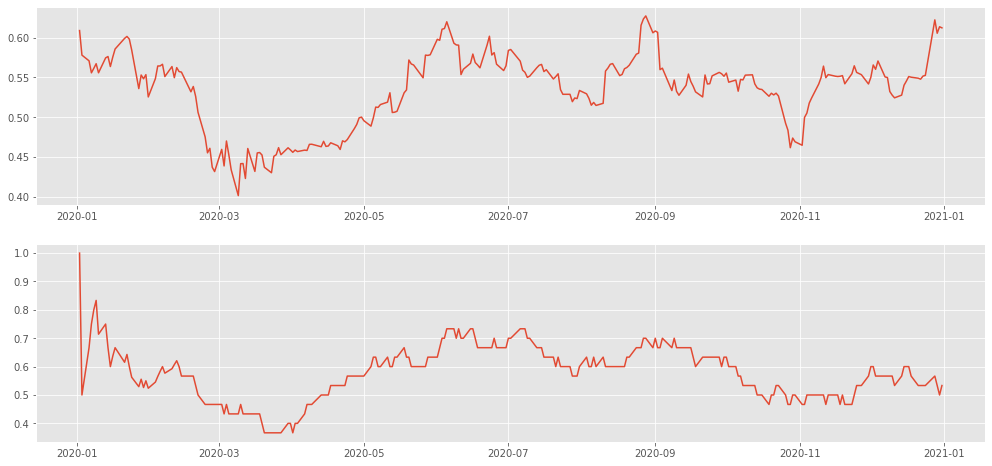

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(17,8))
df = df_out_sample.loc['2020-01-01':'2020-12-31', ['XLK_TLT.O_probMomentum', 'XLK_TLT']]
ax[0].plot(df.index, df['XLK_TLT.O_probMomentum'].rolling(1, min_periods=1).mean())
ax[1].plot(df.index, df['XLK_TLT'].rolling(30, min_periods=1).mean())